In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = ImpedanceModel("R0-(R1//(CPE1))-(R2//C2)")
model.circuit_structure

('series', 'R0', ('parallel', 'R1', 'CPE1'), ('parallel', 'R2', 'C2'))

C:\Users\mlp\AppData\Local\Temp\ipykernel_1232\1580645299.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


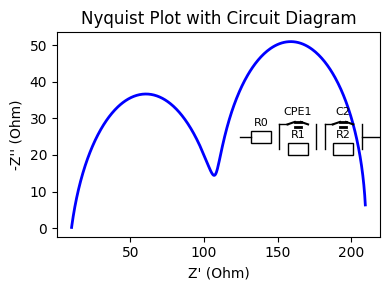

In [33]:
model = ImpedanceModel("R0-(R1//CPE1)-(R2//C2)")
omega = 2 * np.pi * np.logspace(-1, 6, 1000)  # 10 Hz to 1 MHz in rad/s
Z = model.impedance(omega, R0=10, R1=100, CPE1=(1e-6,0.8), R2=1e2, C2=1e-3)

# Create main plot
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(Z[:1000], -Z[1000:], 'b-', linewidth=2)
ax.set_xlabel('Z\' (Ohm)')
ax.set_ylabel('-Z\'\' (Ohm)')
ax.set_title('Nyquist Plot with Circuit Diagram')

# Add circuit as inset
model.draw_circuit(
    ax=ax,
    position=[1.5, 2],  # Relative size (40% of parent axes)
    loc='lower right',     # Position in parent axes
    borderpad=0,           # Padding from axes border
    scale=1.              # Scale up elements slightly
)

plt.tight_layout()
plt.show()

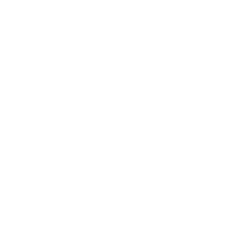

In [5]:
model.draw_circuit(size=(3, 3))
